<a href="https://colab.research.google.com/github/LuisGDP1711/PDSeI_Deteccion_Peso_Cuyes/blob/main/Practicas/P03_PDSeI__Convolucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![https://e.rpp-noticias.io/normal/2015/12/22/285428_50186.jpg](https://e.rpp-noticias.io/normal/2015/12/22/285428_50186.jpg)

**ESCUELA DE INGENIERÍA MECATRÓNICA**

## `PROCESAMIENTO DIGITAL DE SEÑALES E IMÁGENES`

### `Docente: Ms. Ing. Emerson Maximo Asto Rodriguez`

```
Práctica 4: implementación de la convolución
```

## **Practica 4: Implementación de la convolución discreta**

###**4.1. Importación de Librerías**

* **Librerias a utilizar:**

In [ ]:
import numpy as np
import matplotlib. pyplot as plt
import pylab as pl
import time
from IPython import display
plt.style.use(['dark_background']) #Para gráficas para temas oscuros.

###**4.2. Cálculo de la convolución usando una funcion de alto nivel**

![https://graphics.stanford.edu/courses/cs178/applets/convolution-equation2-c.jpg](https://graphics.stanford.edu/courses/cs178/applets/convolution-equation2-c.jpg)


![https://qph.fs.quoracdn.net/main-qimg-cb81d3dfbe146b84ebf717ec12722f32.webp](https://qph.fs.quoracdn.net/main-qimg-cb81d3dfbe146b84ebf717ec12722f32.webp)

* **Creación de la señal y el kernel**

In [ ]:
#Creando una señal arbitraria
senal1 = np.concatenate( (np.zeros(30), np.ones(2), np.zeros(20),np.ones(30),2*np.ones(10),np.zeros(30),-np.ones(10),np.zeros(40)) )
# Señal más compleja con valores crecientes
senal_compleja = np.concatenate((
    np.linspace(0, 1, 30),   # Segmento que va de 0 a 1 en 30 pasos
    np.ones(10),             # 10 valores de 1
    np.linspace(1, 2, 20),   # Segmento que va de 1 a 2 en 20 pasos
    np.zeros(15),            # 15 ceros
    np.linspace(-1, 0, 10),  # Segmento que va de -1 a 0 en 10 pasos
    -np.ones(10),            # 10 valores de -1
    np.linspace(0, 3, 40),   # Segmento que va de 0 a 3 en 40 pasos
    np.zeros(20)             # 20 ceros
))

#Creando el kernel
kernel = np.exp( -np.linspace(-2,2,20)**2 ) #Función gaussiana
kernel = kernel/sum(kernel)
N = len(senal1) #Longitud de la señal


* **Mostrando señales creadas**

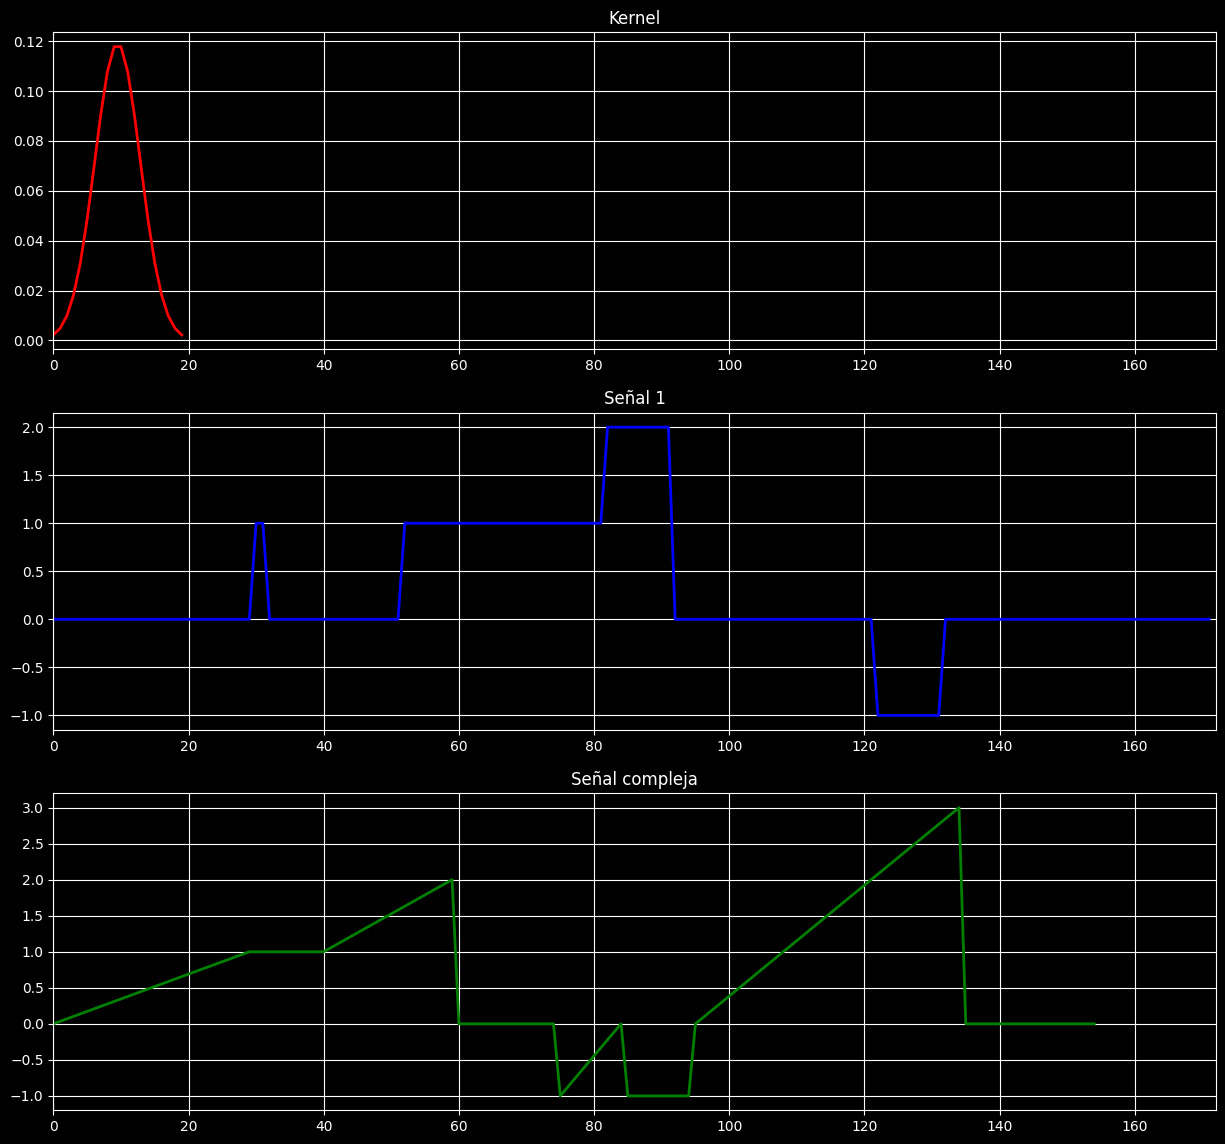

In [ ]:
plt.figure(figsize=(15,14)) #Estableciendo el tamaño de la gráfica

#Grafica del kernel
plt.subplot(311)
plt.plot(kernel,'r', linewidth=2)
plt.xlim([0,N]) #Limitamos el eje x entre 0 y N
plt.title('Kernel')
plt.grid()

#Grafica de la señal
plt.subplot(312)
plt.plot(senal1,'b', linewidth=2,)
plt.xlim([0,N]) #Limitamos el eje x entre 0 y N
plt.title('Señal 1')
plt.grid()

#Grafica de la señal
plt.subplot(313)
plt.plot(senal_compleja,'g', linewidth=2,)
plt.xlim([0,N]) #Limitamos el eje x entre 0 y N
plt.title('Señal compleja')
plt.grid()

plt.show()

 * **Cálculo y gráfica de la convolución**

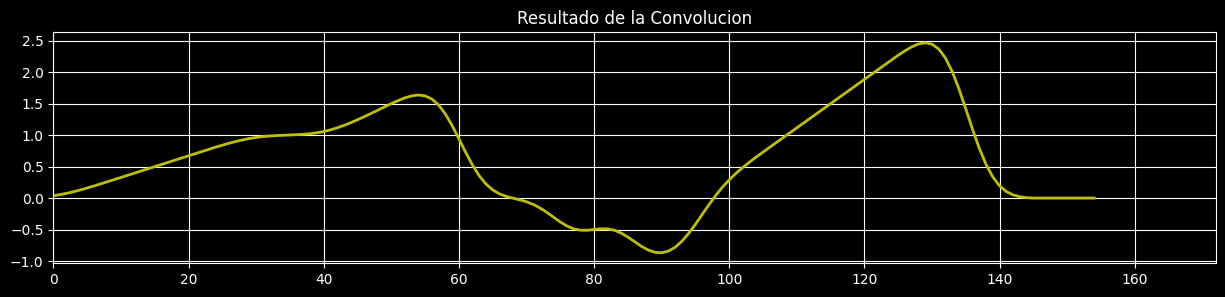

In [ ]:
senal1 = senal_compleja
resultado = np.convolve(senal1,kernel,'same') #El 'same' indica que el resultado debe ser recortado y tener
                                              # las mismas dimensiones que la señal de entrada. Si se desea
                                              # el resultado completo se puede usar 'full' y no limitar el
                                              # eje x.

plt.figure(figsize=(15,3))

plt.plot(resultado, 'y', linewidth=2)
plt.xlim([0,N]) #Limitamos el eje x entre 0 y N
plt.title('Resultado de la Convolucion')
plt.grid()

plt.show()

###**4.2. Detalles de la convolución**
>*Longitud de la convolución de 2 señales.*

>*Efecto del kernel*

* **Creación de señales y aplicación de la convolución**





In [ ]:
#Creando un pulso
senal1 = np.zeros(20)
senal1[8:15] = 1

# Kernel arbitrario
kernel = np.array([1,.8,.6,.4,.2])

# Tamaño de la convolución
nSenal1 = len(senal1)
nkernel = len(kernel)
nConvolucion = nSenal1 + nkernel - 1

#Aplicacion de la convolucion
resultado = np.convolve(senal1 ,kernel, 'full')

* **Graficando resultados**

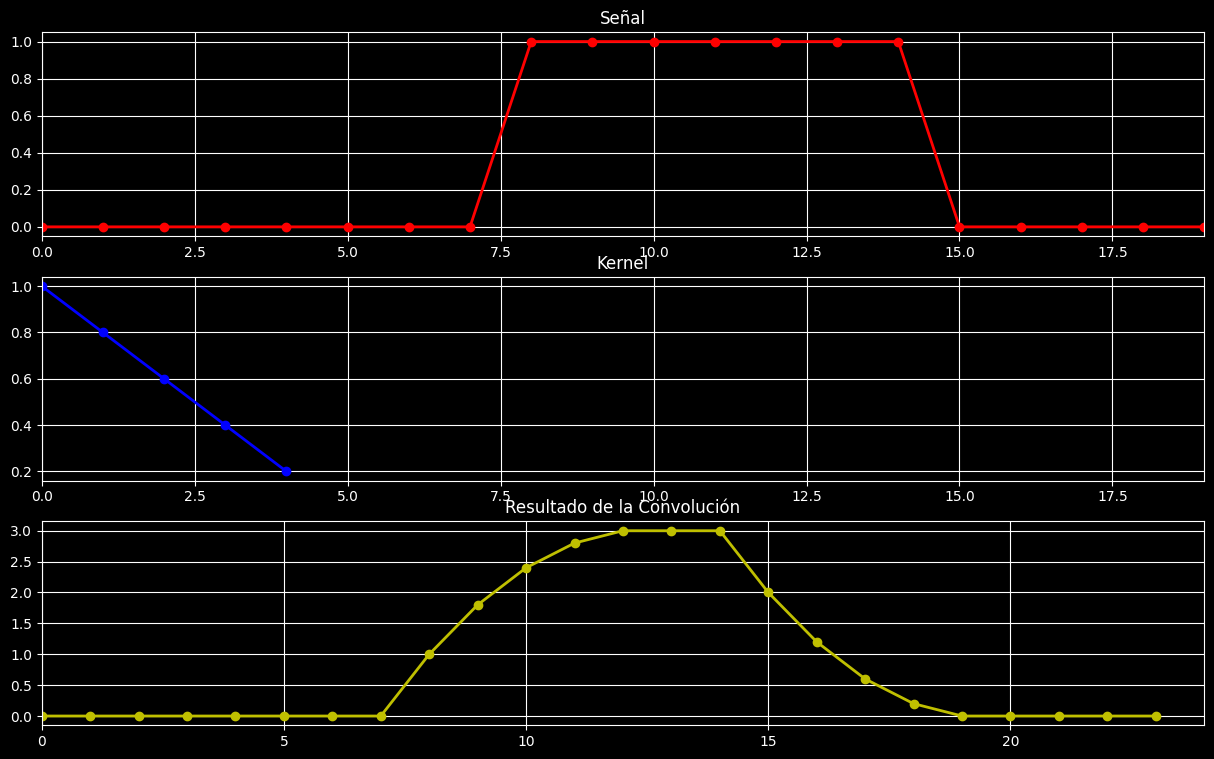

In [ ]:
plt.figure(figsize=(15,9))

#Gráfica de la señal1
plt.subplot(311)
plt.plot(senal1,'ro-', linewidth=2)
plt.xlim([0,nSenal1-1])
plt.title('Señal')
plt.grid()

# Gráfica del kernel
plt.subplot(312)
plt.plot(kernel,'bo-', linewidth=2)
plt.xlim([0,nSenal1-1])
plt.title('Kernel')
plt.grid()

#Gráfica de los resultados
plt.subplot(313)
plt.plot(resultado,'yo-', linewidth=2)
plt.xlim([0,nConvolucion])
plt.title('Resultado de la Convolución')
plt.grid()
plt.show()

###**4.3. Animación de la convolución**

*Se usarán las señales creadas en el apartado anterior*

In [ ]:
import warnings
warnings.filterwarnings('ignore')

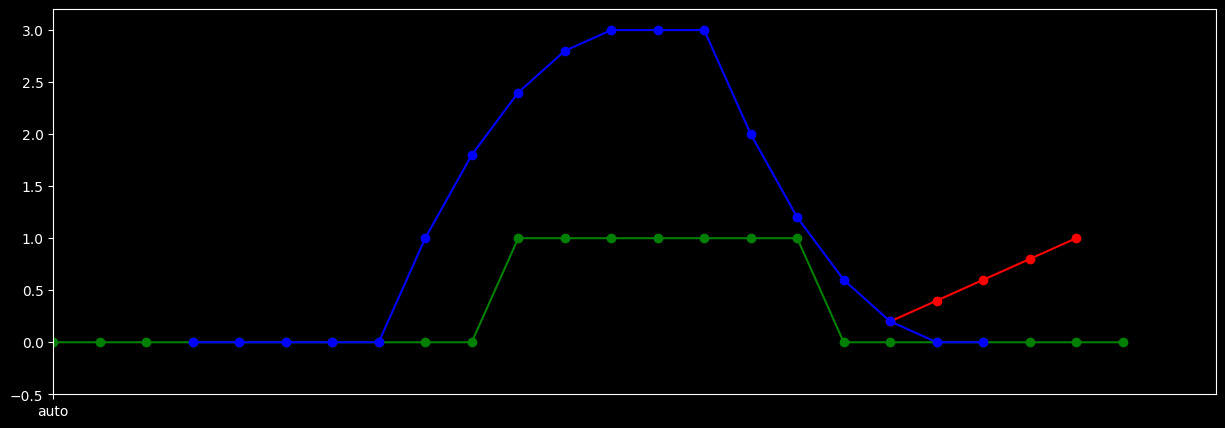

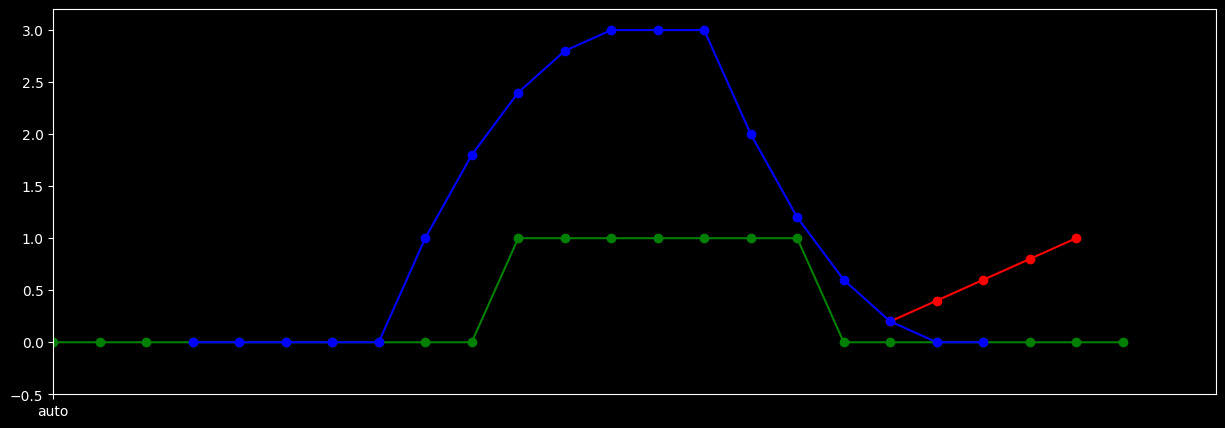

In [ ]:
# Calculamos la mitad del kernel
mitad_kernel = int(np.floor(nkernel/2))

# Invertimos el kernel
kernel_invertido = kernel[::-1]

# Rellenando la señal con 0's para almacenar la salida
senal1_pad = np.concatenate((np.zeros(mitad_kernel), senal1, np.zeros(mitad_kernel)) ,axis=0)

# Vector para almacenar el resultado
conv_resultado = np.zeros(nConvolucion)

# Correr la convolución
plt.figure(figsize=(15,5))

#redondeado hacia abajo

for ti in range(mitad_kernel, nConvolucion-mitad_kernel):

    # Extrayendo una ventana del tamaño del kernel
    ventana = senal1_pad[ti-mitad_kernel: ti+mitad_kernel+1]

    # Producto punto de la ventana con el kernel invertido
    conv_resultado[ti] = np.sum(ventana * kernel_invertido )

    # Graficando
    plt.cla() # Limpiar los ejes
    plt.axis(['auto','auto', -0.5, 3.2 ])
    plt.plot(senal1_pad,"go-") # muestra la señal original
    plt.plot(np.arange(ti-mitad_kernel-1, ti+mitad_kernel), kernel_invertido, "ro-") # Muestra el movimiento del kernel
    plt.plot(np.arange(mitad_kernel+1, ti), conv_resultado[mitad_kernel+1:ti], "bo-") # Muestra el resultado
    plt.xlim([0,nConvolucion+1]) #Rango del eje x

    display.clear_output(wait=True) #Limpia la salida de la celda
    display.display(plt.gcf()) #Selecciona la grafica actual donde volverá a graficar

    time.sleep(0.5)

#recortando los ejes
conv_resultado = conv_resultado[mitad_kernel :- mitad_kernel]



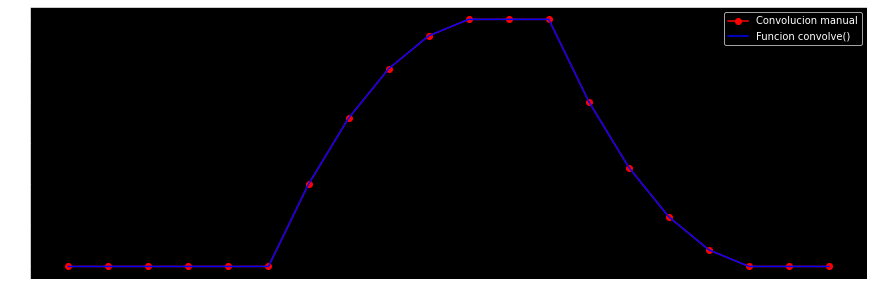